## INTERNSAVY , DATA SCIENCE

### TASK ONE

Use Classification Technique for prediction of Graduate Admissions from an Indian Perspective

### Problem Overview
The task at hand is to use classification techniques for predicting graduate admissions from an Indian perspective. This is a common application of machine learning in the field of education and is relevant for students and institutions in India.

I aim to predict the likelihood of admission to graduate programs in Indian universities based on various factors such as academic performance, test scores, and other application attributes.



### Objective 
The primary objective is to create a predictive model that can assess the likelihood of a student gaining admission to a graduate program based on various factors. This model can assist both students in assessing their chances and educational institutions in their admission selection process.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading the datset
dataset = pd.read_csv('Admission_Predict.csv')

In [3]:
#Lets view the first five colums of the datset
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [5]:
# At this point i am going to drop the Column that i dont need for the analysis of this task.

dataset.drop('Serial No.', axis=1, inplace=True)


In [6]:
# Lets confirm that the Colum is dropped by cgecking our dataset
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## Exploratory Data Analysis - EDA

### UNIVARIATE ANALYSIS
Univariate analysis is a statistical analysis technique that deals with the examination and interpretation of data on a single variable.

This will help me in understanding the characteristics and distribution of a variable without considering the relationships between multiple variables.

Univariate analysis is particularly useful i want to explore and summarize data to gain insights into a specific variable's properties.



In [8]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# Calculate count of each category in the "University Rating" column
university_rating_counts = dataset['University Rating'].value_counts()
print("Count of Each University Rating Category:")
print(university_rating_counts)


Count of Each University Rating Category:
3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64


In [10]:
# Calculate percentage of each category in the "Research" column
research_percentage = (dataset['Research'].value_counts() / len(dataset)) * 100
print("Percentage of Each Research Category:")
print(research_percentage)


Percentage of Each Research Category:
1    54.75
0    45.25
Name: Research, dtype: float64


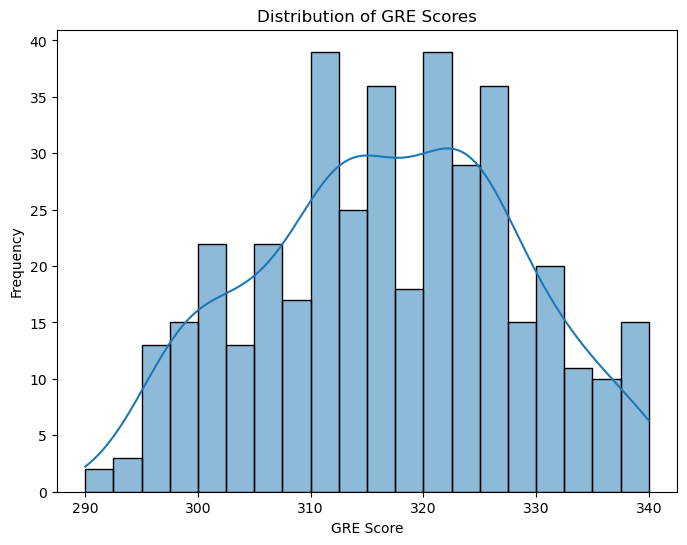

In [11]:
# Create a histogram for the "GRE Score" column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['GRE Score'], bins=20, kde=True)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()


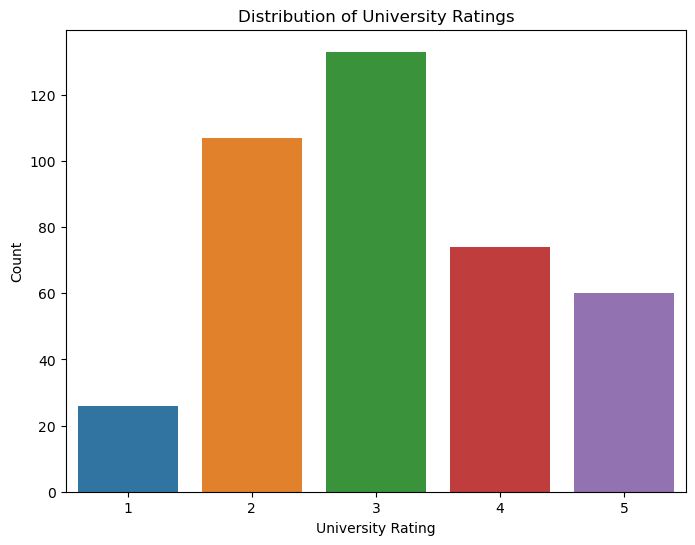

In [12]:
# Create a bar chart for the "University Rating" column
plt.figure(figsize=(8, 6))
university_rating_counts = dataset['University Rating'].value_counts()
sns.barplot(x=university_rating_counts.index, y=university_rating_counts.values)
plt.title('Distribution of University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()


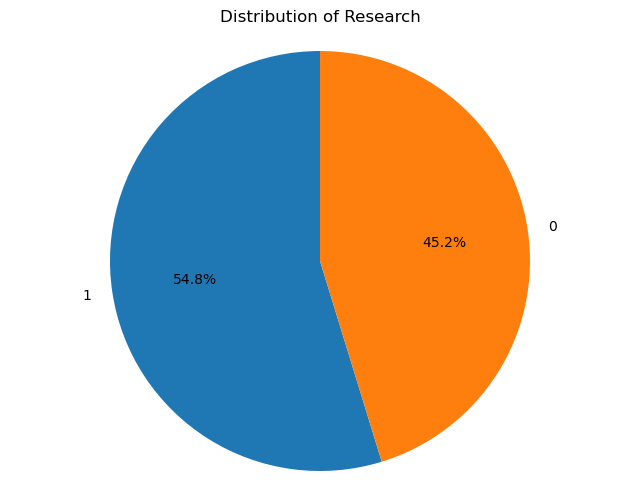

In [13]:
# Create a pie chart for the "Research" column
plt.figure(figsize=(8, 6))
research_counts = dataset['Research'].value_counts()
plt.pie(research_counts, labels=research_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Research')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### BIVARIATE ANALYSIS

This will examine the relationships between pairs of variables.

In [14]:
dataset.corr('pearson')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [15]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

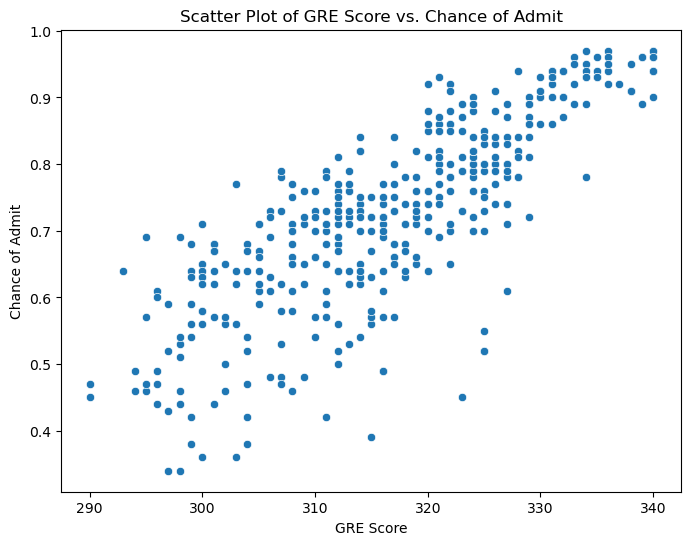

In [16]:
# Removing the space at the end of the column name 'Chance of Admit '
dataset.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=dataset)
plt.title('Scatter Plot of GRE Score vs. Chance of Admit')
plt.show()



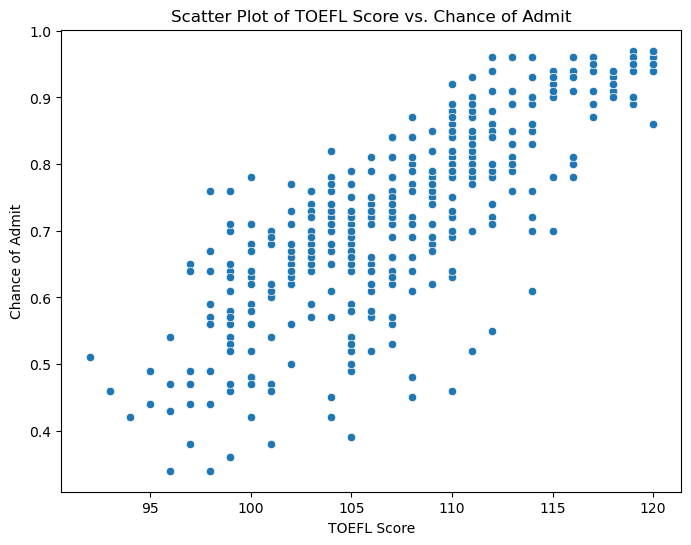

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=dataset)
plt.title('Scatter Plot of TOEFL Score vs. Chance of Admit')
plt.show()

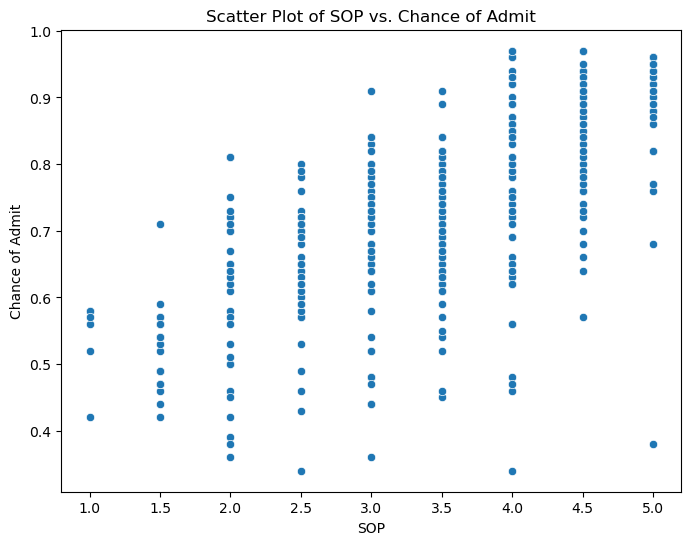

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SOP', y='Chance of Admit', data=dataset)
plt.title('Scatter Plot of SOP vs. Chance of Admit')
plt.show()

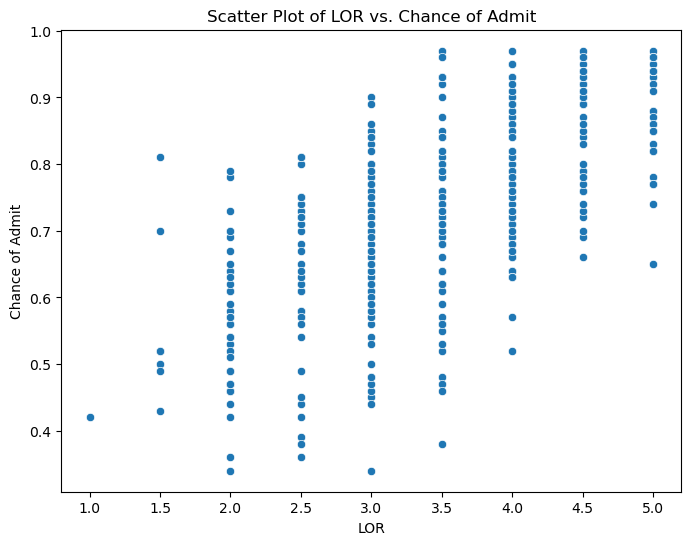

In [19]:
# Remove leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Now, create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LOR', y='Chance of Admit', data=dataset)
plt.title('Scatter Plot of LOR vs. Chance of Admit')
plt.show()



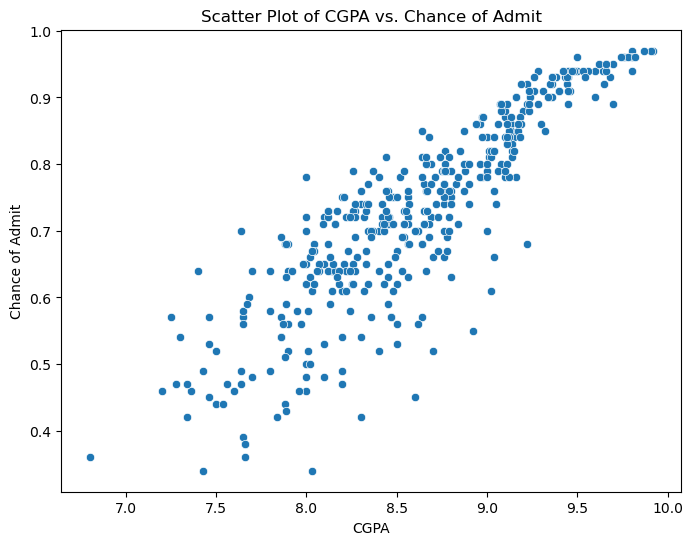

In [20]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CGPA', y='Chance of Admit', data=dataset)
plt.title('Scatter Plot of CGPA vs. Chance of Admit')
plt.show()

In [21]:
# Calculate correlation coefficients
correlation_matrix = dataset[['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']].corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)


                 GRE Score  TOEFL Score       SOP       LOR      CGPA  \
GRE Score         1.000000     0.835977  0.612831  0.557555  0.833060   
TOEFL Score       0.835977     1.000000  0.657981  0.567721  0.828417   
SOP               0.612831     0.657981  1.000000  0.729593  0.718144   
LOR               0.557555     0.567721  0.729593  1.000000  0.670211   
CGPA              0.833060     0.828417  0.718144  0.670211  1.000000   
Chance of Admit   0.802610     0.791594  0.675732  0.669889  0.873289   

                 Chance of Admit  
GRE Score               0.802610  
TOEFL Score             0.791594  
SOP                     0.675732  
LOR                     0.669889  
CGPA                    0.873289  
Chance of Admit         1.000000  


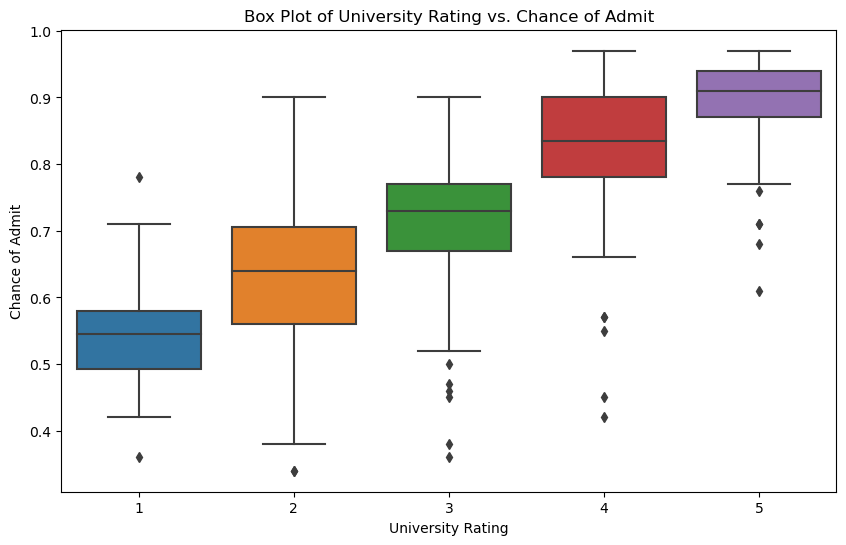

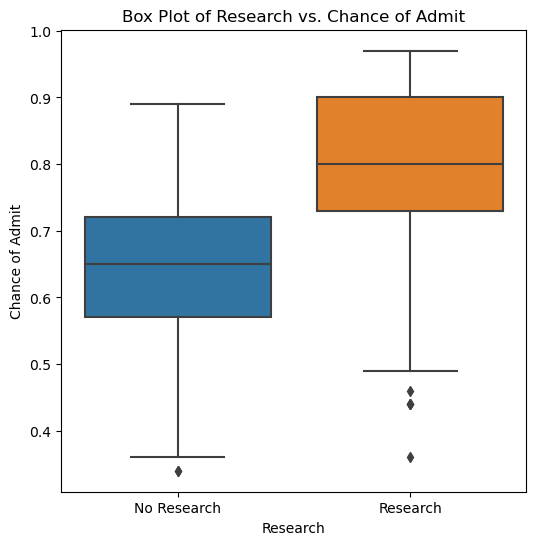

In [22]:
# Box plot for University Rating vs. Admission Probability
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Rating', y='Chance of Admit', data=dataset)
plt.title('Box Plot of University Rating vs. Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

# Box plot for Research vs. Admission Probability
plt.figure(figsize=(6, 6))
sns.boxplot(x='Research', y='Chance of Admit', data=dataset)
plt.title('Box Plot of Research vs. Chance of Admit')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.xticks([0, 1], ['No Research', 'Research'])
plt.show()


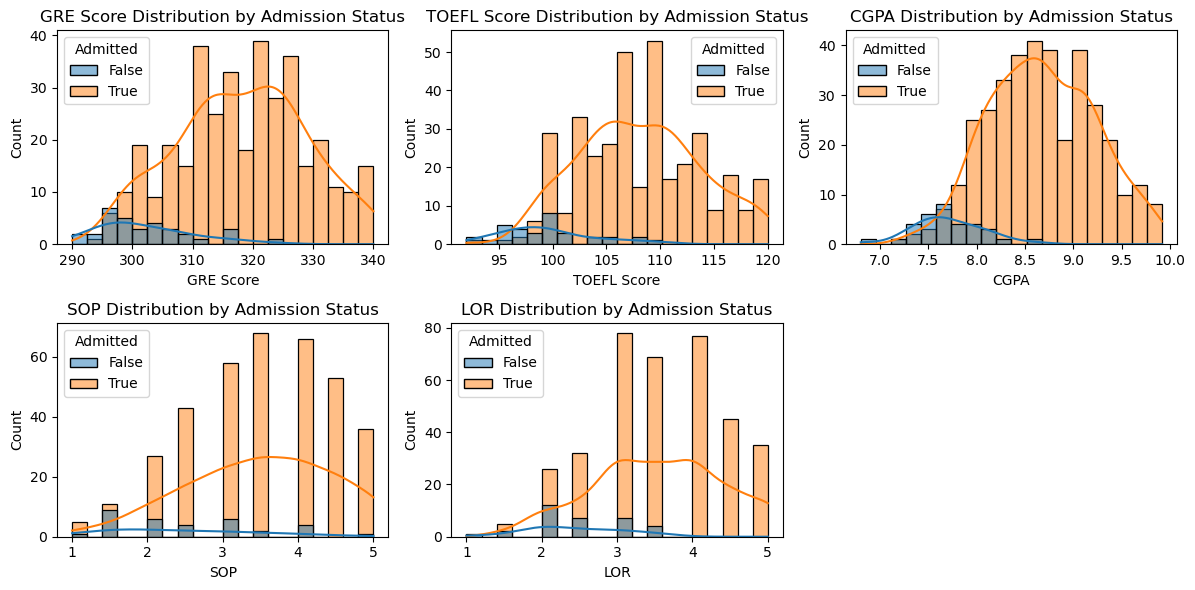

In [23]:

# Create a new column 'Admitted' based on Admission Probability
dataset['Admitted'] = dataset['Chance of Admit'] >= 0.5  # You can adjust the threshold as needed

# Histograms and Density Plots
plt.figure(figsize=(12, 6))
columns_to_plot = ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR']
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)
    sns.histplot(data=dataset, x=column, hue='Admitted', kde=True, bins=20)
    plt.title(f'{column} Distribution by Admission Status')
plt.tight_layout()
plt.show()


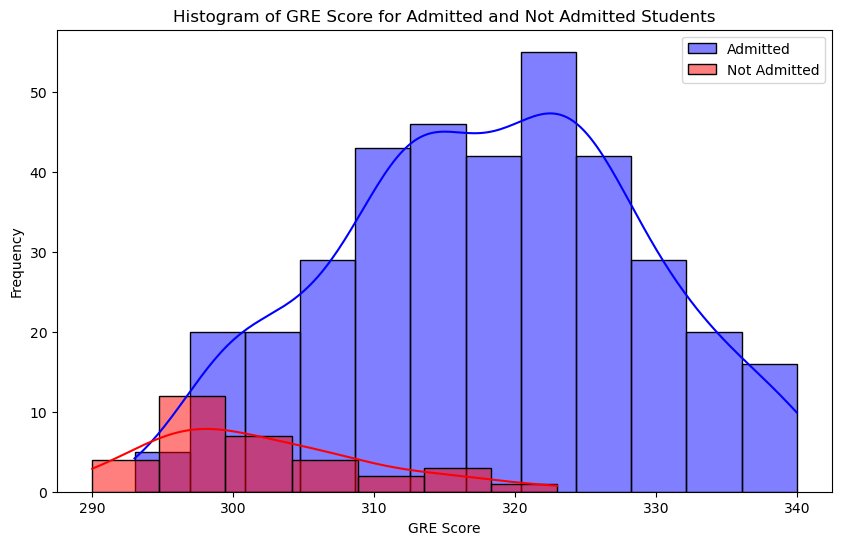

In [24]:
# Create separate DataFrames for admitted and not admitted students
admitted = dataset[dataset['Chance of Admit'] >= 0.5]
not_admitted = dataset[dataset['Chance of Admit'] < 0.5]

# Plot histograms for GRE Score
plt.figure(figsize=(10, 6))
sns.histplot(admitted['GRE Score'], color='blue', label='Admitted', kde=True)
sns.histplot(not_admitted['GRE Score'], color='red', label='Not Admitted', kde=True)
plt.title('Histogram of GRE Score for Admitted and Not Admitted Students')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


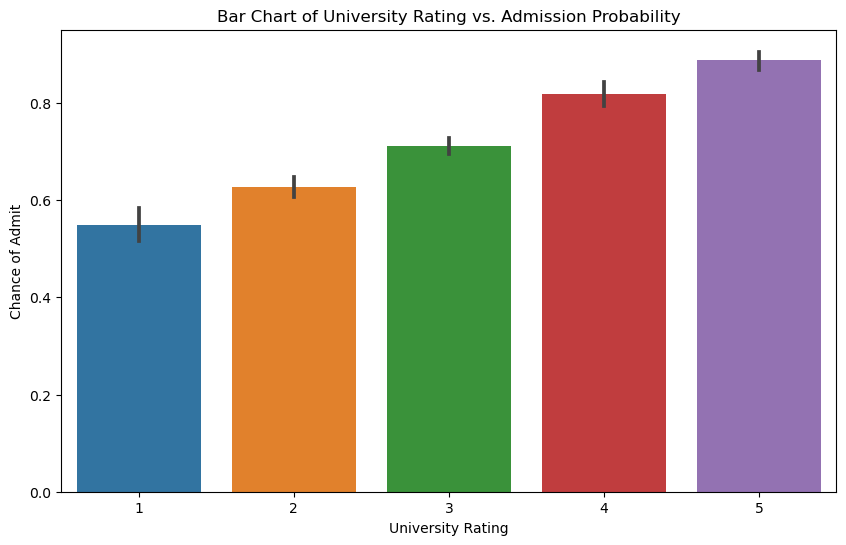

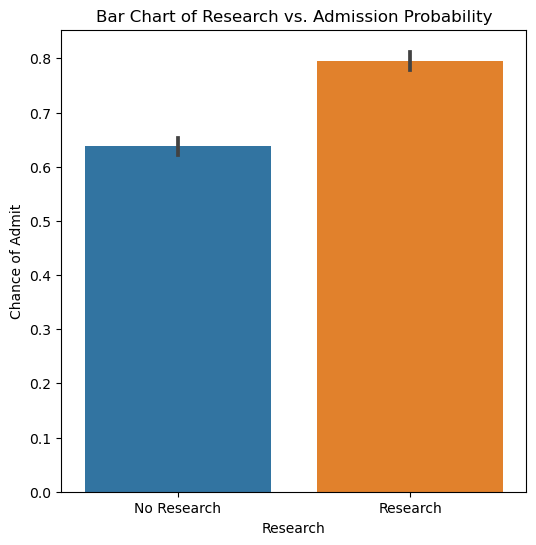

In [25]:
# Bar chart for University Rating vs. Admission Probability
plt.figure(figsize=(10, 6))
sns.barplot(x='University Rating', y='Chance of Admit', data=dataset)
plt.title('Bar Chart of University Rating vs. Admission Probability')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

# Bar chart for Research vs. Admission Probability
plt.figure(figsize=(6, 6))
sns.barplot(x='Research', y='Chance of Admit', data=dataset)
plt.title('Bar Chart of Research vs. Admission Probability')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.xticks([0, 1], ['No Research', 'Research'])
plt.show()


In [26]:
import statsmodels.api as sm
# Define the predictor variables
X = dataset[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR']]

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Define the target variable
y = dataset['Chance of Admit']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     311.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          2.35e-134
Time:                        23:07:10   Log-Likelihood:                 531.78
No. Observations:                 400   AIC:                            -1052.
Df Residuals:                     394   BIC:                            -1028.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4621      0.109    -13.417      

In [27]:
from sklearn.model_selection import train_test_split
# Convert 'Chance of Admit' into a binary outcome
dataset['Chance of Admit'] = (dataset['Chance of Admit'] >= 0.5).astype(int)

#Data Splitting
X = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = dataset['Admitted']

# Split the data into a training set and a testing set (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Classification Algorithm - Logistic Regression
model = LogisticRegression()

# Model Training and Evaluation
# Train the classification model
model.fit(X_train, y_train)  

# Make predictions on the test data
y_pred = model.predict(X_test)  

# Evaluate the classification model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  

# Generate a classification report
class_report = classification_report(y_test, y_pred) 

print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)



Accuracy: 0.8625
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        10
        True       0.87      0.99      0.93        70

    accuracy                           0.86        80
   macro avg       0.44      0.49      0.46        80
weighted avg       0.76      0.86      0.81        80



C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:

from sklearn.model_selection import GridSearchCV
import warnings

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Hyperparameter Tuning
# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy of Best Model:", accuracy)
print("Classification Report for Best Model:")
print(class_report)

Best Hyperparameters: {'C': 100, 'solver': 'lbfgs'}
Accuracy of Best Model: 0.95
Classification Report for Best Model:
              precision    recall  f1-score   support

       False       1.00      0.60      0.75        10
        True       0.95      1.00      0.97        70

    accuracy                           0.95        80
   macro avg       0.97      0.80      0.86        80
weighted avg       0.95      0.95      0.94        80



In [30]:
# Use the best model to make predictions on new data
new_data = pd.DataFrame({'GRE Score': [320], 'TOEFL Score': [110], 'University Rating': [4], 'SOP': [4], 'LOR': [4.5], 'CGPA': [8.8], 'Research': [1]})

# Predict the Admission Status (1 for admitted, 0 for not admitted)
admission_status = best_model.predict(new_data)
print("Predicted Admission Status:", admission_status)


Predicted Admission Status: [ True]


In [31]:
# I get the coefficients (importance) of each feature
coefficients = best_model.coef_[0]

# Map coefficients to feature names
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# Create a dictionary to associate feature names with their coefficients
coefficients_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}

# Display the importance of each feature
print("Feature Coefficients:")
for feature, coef in coefficients_dict.items():
    print(f"{feature}: {coef:.4f}")


Feature Coefficients:
GRE Score: 0.0372
TOEFL Score: 0.2422
University Rating: -0.8698
SOP: -0.5884
LOR: 0.9327
CGPA: 3.6510
Research: -0.2673


The output above consists of feature coefficients. These coefficients are associated with each feature in my logistic regression model and provide valuable insights into how each feature contributes to the prediction of the target variable which is Admission Status . 
Here's what i can tell from these coefficients:

Interpretation of Coefficients: 

Positive coefficients indicate that an increase in the corresponding feature value will increase the likelihood of being admitted, while negative coefficients suggest that an increase in the feature value will decrease the likelihood of admission.

Feature Importance:

Features with larger absolute coefficients have a more significant impact on the prediction. 

In this case the feature with the largest positive coefficient is "LOR," which has the highest positive impact on the likelihood of admission.

The feature with the largest negative coefficient is "University Rating," indicating that a higher university rating negatively affects the likelihood of admission.

Direction of Influence: 

Coefficients indicate the direction of influence. 
In our case , the "CGPA" coefficient is positive, meaning that higher CGPA scores positively influence the likelihood of admission.

Magnitude of Impact: 

The magnitude of the coefficients provides information about the strength of the feature's influence.
Features with larger absolute coefficients have a stronger impact.

In this case, "University Rating," "SOP," and "Research" have negative coefficients, which suggest that having a lower university rating, SOP score, or no research experience negatively affects the likelihood of admission.



### CONCLUSION AND SUMMARY


Positive coefficients (e.g., GRE Score, TOEFL Score, LOR, and CGPA) indicate that an increase in these features is associated with a higher probability of being admitted.

Negative coefficients (e.g., University Rating, SOP, and Research) indicate that an increase in these features is associated with a lower probability of being admitted.

In summary, your model suggests that higher GRE and TOEFL scores, strong letters of recommendation (LOR), and a higher Cumulative Grade Point Average (CGPA) positively influence the probability of admission. Conversely, a lower university rating, weaker Statement of Purpose (SOP), and lack of research experience (Research = 0) have a negative impact on the probability of admission.